<a href="https://colab.research.google.com/github/famigerate/NSW-Housing-Finance-New-Loan-Analysis/blob/main/NSW_Housing_Finance_New_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of NSW new loan given to household by banks imposed with the median of Sydney house prices. The source is taken from Australia Beurau of Statistics website.  

Data Source and Analysis:

- The Australian Bureau of Statistics provided the total housing finance figures for owner-occupiers and first home buyers. Subsequent housing finance figures were derived based on this dataset.
- Given the relatively small dataset, Microsoft Excel was utilized for data processing and analysis.
- The full dataset can be accessed [here](https://github.com/famigerate/NSW-Housing-Finance-New-Loan-Analysis/blob/5f39f33ad4a1b569ae150cd13f1355abe387fc0f/NSW-FHB-vs-Subsequent-Loan.xlsx
).


Data Consideration:
- The dataset begins in July 2019, as this is when records for housing finance owner-occupiers were first introduced.
- The NSW Subsequent Investment is calculated using the original value loan amounts, unlike other metrics, which are based on seasonally adjusted loan amounts as the ABS did not provide the seasonally adjusted metric data.
- The NSW Subsequent Investment loan quantity are reflection of loan given away by banks and not the amount of people approved for a loan (i.e one person can hold multiple subsequent investment loans)
- The dataset finished in July 2024.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

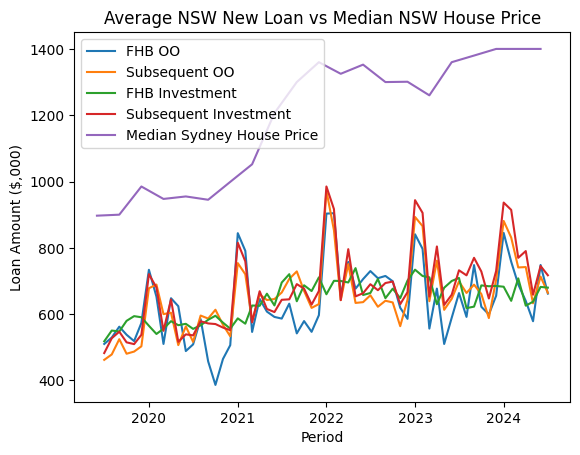

In [3]:
file_path = 'https://raw.githubusercontent.com/famigerate/loan-data-analysis/main/NSW-FHB-vs-Subsequent-Loan.xlsx'
sheet_dict = pd.read_excel(file_path, sheet_name=None)
# Skipping the first sheet because the first sheet is chart sheet and Median House Price has diffrent column header
sheet_names = list(sheet_dict.keys())[1:-1]

# Plotting Actual Value
for sheet_name in sheet_names:
    sheet = sheet_dict[sheet_name]
    actual_value_x = sheet["Period"]
    actual_value_y = sheet["Average of Loan (,000)"]
    plt.plot(actual_value_x,actual_value_y)
nsw_median_price = sheet_dict["NSW-Median-Price"]
plt.plot(nsw_median_price["Period"],nsw_median_price["Median Sydney (,000)"])
plt.title("Average NSW New Loan vs Median NSW House Price")
plt.legend(["FHB OO","Subsequent OO","FHB Investment","Subsequent Investment","Median Sydney House Price"
])
plt.xlabel('Period')
plt.ylabel('Loan Amount ($,000)')
plt.show()


Linear regression is applied to the data gathered to produce the following graph.

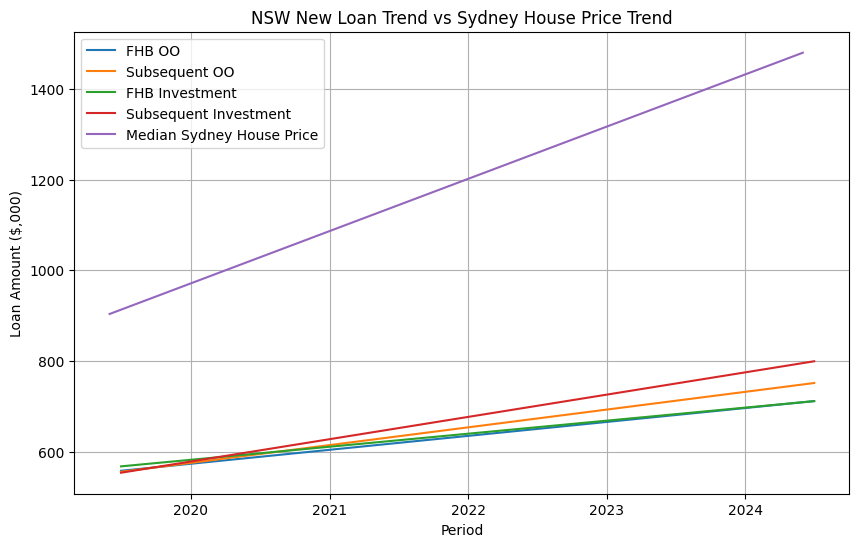

                Loan Type  Start Value ($,000)  End Value ($,000)  Percentage Increase (%)
               NSW-FHB-OO               558.27             711.81                    27.50
        NSW-Subsequent-OO               555.98             751.67                    35.20
       NSW-FHB-Investment               567.99             711.73                    25.31
NSW-Subsequent-Investment               553.98             799.57                    44.33
Sydney-Median-House-Price               903.82            1479.52                    63.70


In [5]:
# Linear regression percentage increase

linear_regression_start = []
linear_regression_finish = []
percentage_increase = []


# Plotting Linear Regression
plt.figure(figsize=(10,6))

for regression_sheet_name in sheet_names:
  regression_sheet = sheet_dict[regression_sheet_name]
  regression_x = regression_sheet["Period"].map(pd.Timestamp.toordinal).values.reshape(-1,1)
  regression_y = regression_sheet["Average of Loan (,000)"].values.reshape(-1,1)

  #linear regression
  linear_regression = LinearRegression()
  linear_regression.fit(regression_x,regression_y)
  regression_y_pred = linear_regression.predict(regression_x)

  #adding it to start and finish regression line for percentage move
  linear_regression_start.append(round(regression_y_pred[0][0],2))
  linear_regression_finish.append(round(regression_y_pred[-1][0],2))
  percentage_increase.append(round((regression_y_pred[-1][0] - regression_y_pred[0][0]) / regression_y_pred[0][0] * 100,2))

  # slope & intercept
  slope = linear_regression.coef_[0]
  intercept = linear_regression.intercept_
  # plot the regression
  plt.plot(regression_sheet["Period"], regression_y_pred, label=f"Trend{regression_sheet_name},Slope: {slope[0]:.2f}")


# plotting the regression for median house price
regression_median_house_price = sheet_dict["NSW-Median-Price"]
regression_median_x = regression_median_house_price["Period"].map(pd.Timestamp.toordinal).values.reshape(-1,1)
regression_median_y = regression_median_house_price["Median Sydney (,000)"].values.reshape(-1,1)
linear_regression = LinearRegression()
linear_regression.fit(regression_median_x,regression_median_y)
regression_median_y_pred = linear_regression.predict(regression_median_x)
median_slope = linear_regression.coef_[0]
median_intercept = linear_regression.intercept_
plt.plot(regression_median_house_price["Period"], regression_median_y_pred, label=f"Trend Median House Price,Slope: {median_slope[0]:.2f}")

#adding it to start and finish regression line for percentage move
linear_regression_start.append(round(regression_median_y_pred[0][0],2))
linear_regression_finish.append(round(regression_median_y_pred[-1][0],2))
percentage_increase.append(round((regression_median_y_pred[-1][0] - regression_median_y_pred[0][0]) / regression_median_y_pred[0][0] * 100,2))

#chart legend and stuff
plt.title("NSW New Loan Trend vs Sydney House Price Trend")
plt.legend(["FHB OO","Subsequent OO","FHB Investment","Subsequent Investment","Median Sydney House Price"])
plt.xlabel('Period')
plt.ylabel('Loan Amount ($,000)')
plt.grid(True)
plt.show()

#table summary
loan_type = list(sheet_dict.keys())[1:-1]
loan_type.append("Sydney-Median-House-Price")
summary_df = pd.DataFrame({
    'Loan Type': loan_type,
    'Start Value ($,000)': linear_regression_start,
    'End Value ($,000)': linear_regression_finish,
    'Percentage Increase (%)': percentage_increase
})
print(summary_df.to_string(index=False))

Reiterating from the data consideration; One person may be approved for multiple subsequent investment loan. Which means the graph above is a conservative estimate as the true loan subsequent loan value is higher in potential.

In conclusion, the data shows notable shift in the average loan ammount given to subsequent loan approval which highlight the steadily growing gap of NSW First Home Buyer in trying to break into the housing market.